# Cats vs Dogs

In [2]:
!pwd

/home/testuser/backup_folder/deep-learning-v2-pytorch/intro-to-pytorch


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
from torchvision import datasets
from torchvision.utils import make_grid
from torch.utils.data import DataLoader, Dataset 
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm
import numpy as np
import os

In [2]:
ROOT = os.path.abspath(os.path.curdir)
DATA_ROOT = os.path.join(ROOT, 'data')
TRAIN_ROOT = os.path.join(DATA_ROOT, 'train')
TEST_ROOT = os.path.join(DATA_ROOT, 'test')

In [3]:
class ImageFolderPath(datasets.ImageFolder):
    """
    class that returns the image filename as well
    """
    def __getitem__(self, index):
        original_tuple = super().__getitem__(index)
        filename = self.imgs[index]
        return (original_tuple[0], original_tuple[1], filename)

In [11]:
train_transform = T.Compose([T.RandomRotation(30), 
                             T.RandomResizedCrop(224), 
                             T.RandomHorizontalFlip(), 
                             T.ToTensor(), 
                             T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

test_transform = T.Compose([T.Resize(244), 
                            T.CenterCrop(224), 
                            T.ToTensor(), 
                            T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

unnormalize = T.Compose([T.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225])])

train_dataset = ImageFolderPath(TRAIN_ROOT, transform=train_transform)

test_dataset = ImageFolderPath(TEST_ROOT, transform=test_transform)

In [5]:
train_dataset.classes, train_dataset

(['cats', 'dogs'],
 Dataset ImageFolderPath
     Number of datapoints: 22980
     Root location: /home/testuser/backup_folder/deep-learning-v2-pytorch/intro-to-pytorch/data/train
     StandardTransform
 Transform: Compose(
                RandomRotation(degrees=(-30, 30), resample=False, expand=False)
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [6]:
train_data = DataLoader(train_dataset, batch_size=512, shuffle=True, pin_memory=True)

In [7]:
imgs, labels, paths = next(iter(train_data))

In [15]:
def unnorm_abunch(tensor_array):
    '''
    gets an array of tensors and applies unnormalize 
    '''
    from copy import deepcopy
    im_grid = deepcopy(tensor_array)
    for image_idx in range(tensor_array.shape[0]):
        im_grid[image_idx] = unnormalize(im_grid[image_idx])
    return im_grid

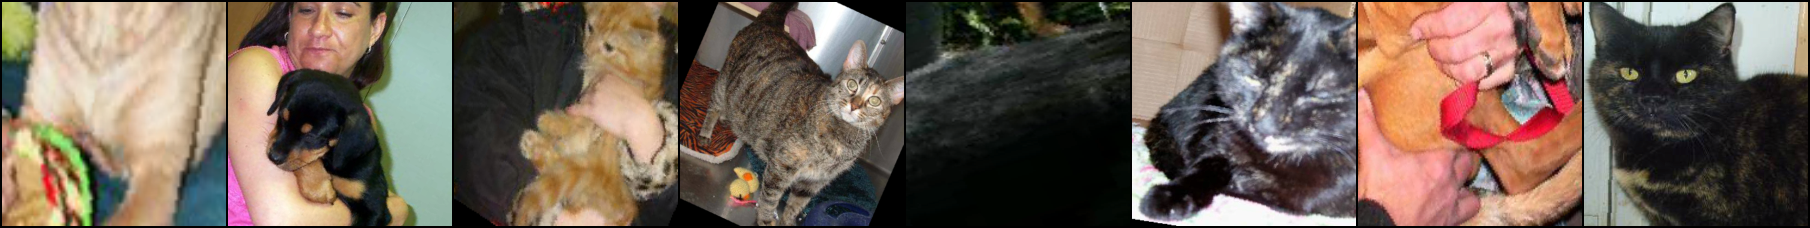

In [21]:
T.ToPILImage()(make_grid(unnorm_abunch(imgs[:8])))

In [22]:
labels[:8]

tensor([1, 1, 0, 0, 1, 0, 1, 0])

In [23]:
test_data = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [24]:
test_imgs, test_labels, test_paths = next(iter(test_data))

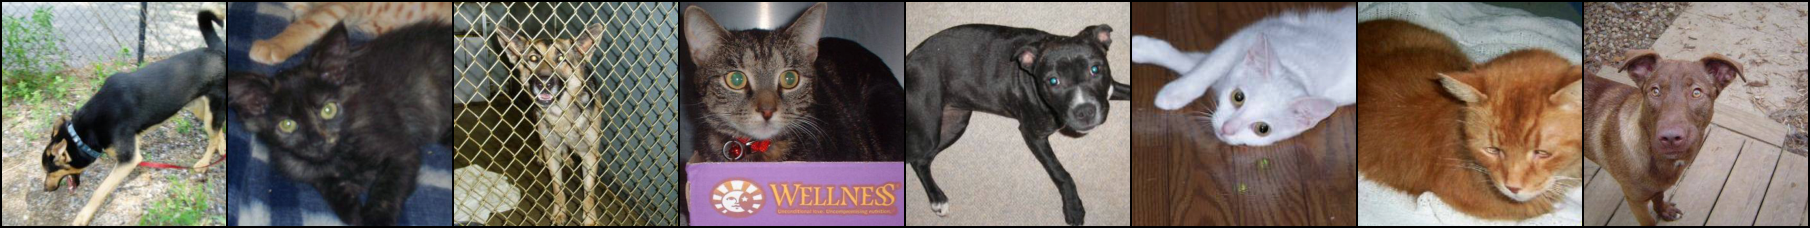

In [25]:
T.ToPILImage()(make_grid(unnorm_abunch(test_imgs[:8])))

In [26]:
test_labels[:8]

tensor([1, 0, 1, 0, 1, 0, 0, 1])

## Let's make some transfer learning

In [27]:
from torchvision.models import resnet50

In [28]:
model = resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/testuser/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [29]:
def number_of_parameters(net):
    """
    get the number of parameters in a network
    """
    return sum((list(map(lambda x: torch.as_tensor(x.flatten().size()).sum().item(), net.parameters())))) 

In [30]:
print(f"Number of parameters in a network {number_of_parameters(model):,}")

Number of parameters in a network 25,557,032


In [31]:
for item in model.named_parameters():
    print(item[0])

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.conv3.weight
layer1.0.bn3.weight
layer1.0.bn3.bias
layer1.0.downsample.0.weight
layer1.0.downsample.1.weight
layer1.0.downsample.1.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.conv3.weight
layer1.1.bn3.weight
layer1.1.bn3.bias
layer1.2.conv1.weight
layer1.2.bn1.weight
layer1.2.bn1.bias
layer1.2.conv2.weight
layer1.2.bn2.weight
layer1.2.bn2.bias
layer1.2.conv3.weight
layer1.2.bn3.weight
layer1.2.bn3.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.conv3.weight
layer2.0.bn3.weight
layer2.0.bn3.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.we

In [33]:
# make all parameters fixed
model.requires_grad_(False);

In [63]:
for item in model.named_parameters():
    print(item[0], item[1].requires_grad)

conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.0.conv3.weight False
layer1.0.bn3.weight False
layer1.0.bn3.bias False
layer1.0.downsample.0.weight False
layer1.0.downsample.1.weight False
layer1.0.downsample.1.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer1.1.conv3.weight False
layer1.1.bn3.weight False
layer1.1.bn3.bias False
layer1.2.conv1.weight False
layer1.2.bn1.weight False
layer1.2.bn1.bias False
layer1.2.conv2.weight False
layer1.2.bn2.weight False
layer1.2.bn2.bias False
layer1.2.conv3.weight False
layer1.2.bn3.weight False
layer1.2.bn3.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2

In [88]:
# make a new classifier
from collections import OrderedDict
model.fc = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(in_features=2048, out_features=256)),
    ('fc1_activation', nn.ReLU()),
    ('fc1_dropout', nn.Dropout(p=0.4)),
    ('fc2', nn.Linear(in_features=256, out_features=2)),
    ('output', nn.LogSoftmax(dim=1))
]))

In [89]:
model.fc.requires_grad_(True)

Sequential(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc1_activation): ReLU()
  (fc1_dropout): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
  (output): LogSoftmax()
)

## Make a training

In [90]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device);

In [91]:
!nvidia-smi

Fri Jul  3 16:45:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64       Driver Version: 440.64       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:86:00.0 Off |                  N/A |
| 27%   36C    P2    58W / 250W |   7531MiB /  7982MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [92]:
N_EPOCH = 3

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.fc.parameters())
mini_batch_cnt = 0

# give output every number of minibatches
report_every = 10

running_loss = 0

for epoch in tqdm(range(N_EPOCH)):

    model.train()
    for images, labels, path in train_data:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        predict = model.forward(images)
        loss = criterion(predict, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        mini_batch_cnt +=1
        
        # make an output of metrics
        if mini_batch_cnt % report_every == 0:
            model.eval()
            with torch.no_grad():
                accuracy = 0.0
                test_loss = 0.0
                
                for images, labels, path in train_data:
                    images, labels = images.to(device), labels.to(device)
                    predict_log_probs = model(images)
                    batch_loss = criterion(predict_log_probs, labels)
                    test_loss += batch_loss.item()
                    _, predict_class = predict_log_probs.max(dim=1)
                    equality = predict_class == labels
                    accuracy += equality.sum().to('cpu').item()
            
            accuracy /= len(train_dataset)
            print(f'''Epoch: {epoch}
            Mini-batch: {mini_batch_cnt}
            Running loss: {running_loss/report_every:.3f}
            Test loss: {test_loss/len(train_data):.3f}
            Accuracy on test : {accuracy:.2%}
            ----------------------------------''')
            running_loss = 0
            model.train()

Epoch: 0
            Mini-batch: 10
            Running loss: 0.688
            Test loss: 0.384
            Accuracy on test : 91.73%
            ----------------------------------
Epoch: 0
            Mini-batch: 20
            Running loss: 0.331
            Test loss: 0.212
            Accuracy on test : 93.35%
            ----------------------------------
Epoch: 0
            Mini-batch: 30
            Running loss: 0.210
            Test loss: 0.165
            Accuracy on test : 93.28%
            ----------------------------------
Epoch: 0
            Mini-batch: 40
            Running loss: 0.173
            Test loss: 0.147
            Accuracy on test : 93.82%
            ----------------------------------
Epoch: 1
            Mini-batch: 50
            Running loss: 0.170
            Test loss: 0.141
            Accuracy on test : 94.14%
            ----------------------------------
Epoch: 1
            Mini-batch: 60
            Running loss: 0.155
            Test loss: